In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skd

from task_2 import *
from task_1 import *

%reload_ext autoreload
%autoreload 2

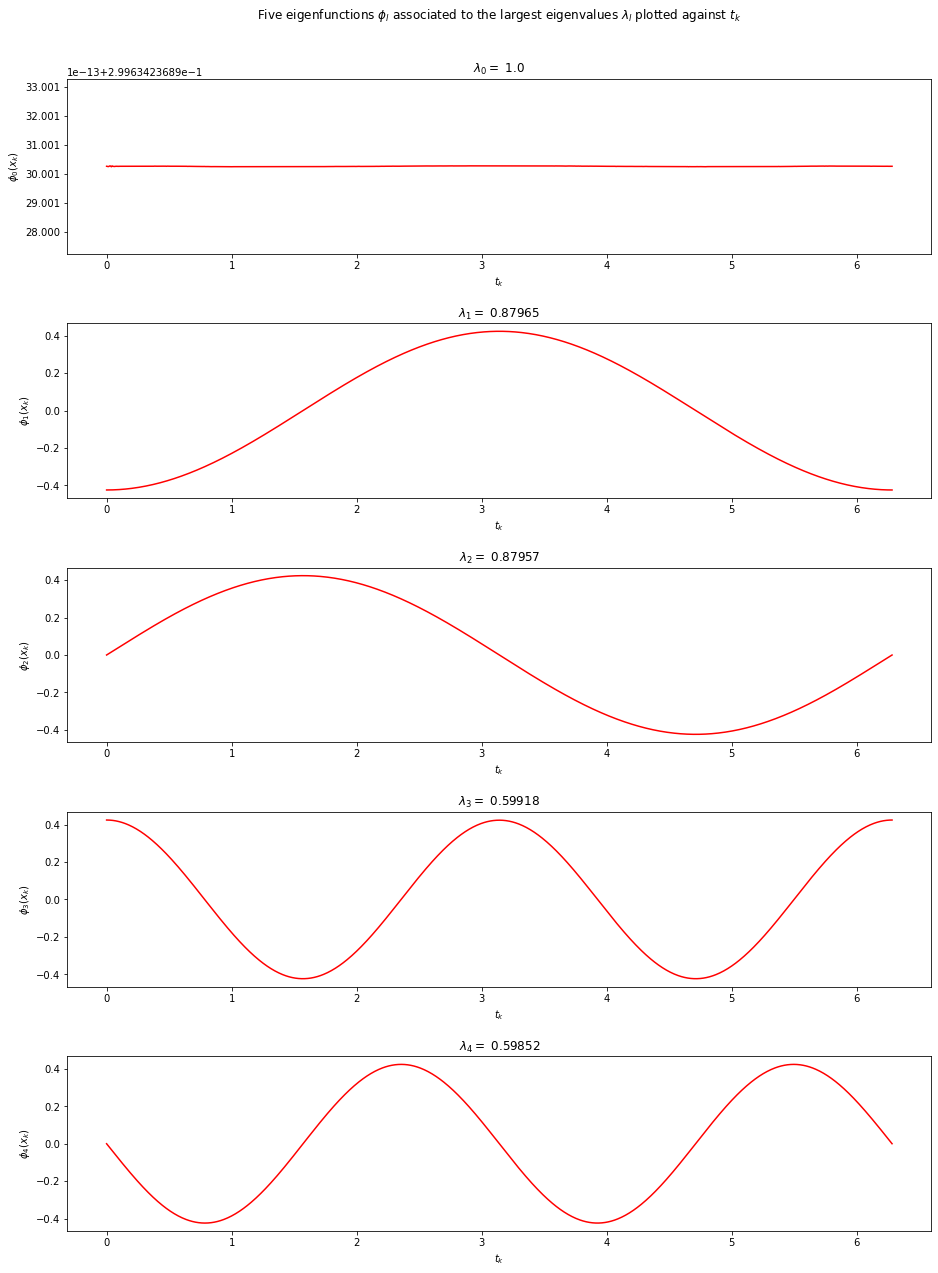

In [2]:
# generate data and apply diffusion map algorithm to it
X, time = generate_periodic_data(1000)
lambda_l, phi_l = diffusion_map(X, 4)

# plot first five eigenfunctions against t_k (time)
fig = plt.figure(figsize=(15, 20))

for idx in range(phi_l.shape[1]):
    ax = fig.add_subplot(phi_l.shape[1], 1, idx + 1)
    ax.plot(time, phi_l[:, -1 - idx], color="red")
    ax.set_title(r"$\lambda_" + str(idx) + " =$ " + str(round(lambda_l[-1 - idx], 5)))
    ax.set_xlabel(r"$t_k$")
    ax.set_ylabel(r"$\phi_" + str(idx) + "(x_k)$")

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle(r"Five eigenfunctions $\phi_l$ associated to the largest eigenvalues $\lambda_l$ plotted against $t_k$", y=0.95);

In [3]:
# generate swiss-roll data and apply diffusion algorithm
X_swiss, time_swiss = skd.make_swiss_roll(5000)
lambda_l_swiss, phi_l_swiss = diffusion_map(X_swiss, 10)

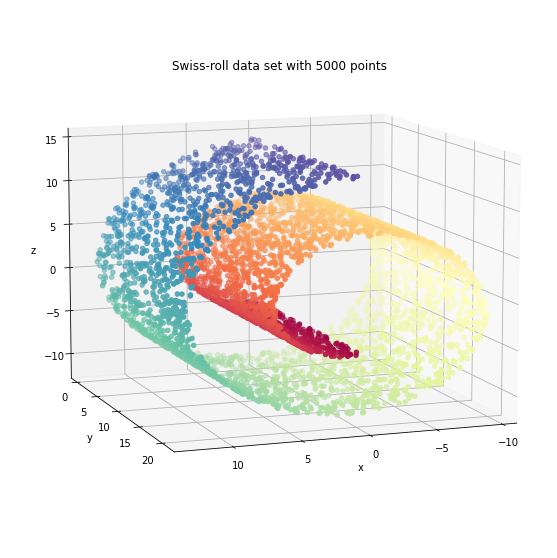

In [4]:
# plot the original data set
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=time_swiss, cmap=plt.cm.Spectral)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Swiss-roll data set with 5000 points", y=0.95)
ax.view_init(10, 70);

The 3 principal components of swiss-roll data sets are the columns of the following matrix:
[[-0.48647171 -0.84245391 -0.23155276]
 [ 0.03107196 -0.28154107  0.95904596]
 [-0.87314364  0.45935393  0.16313846]]


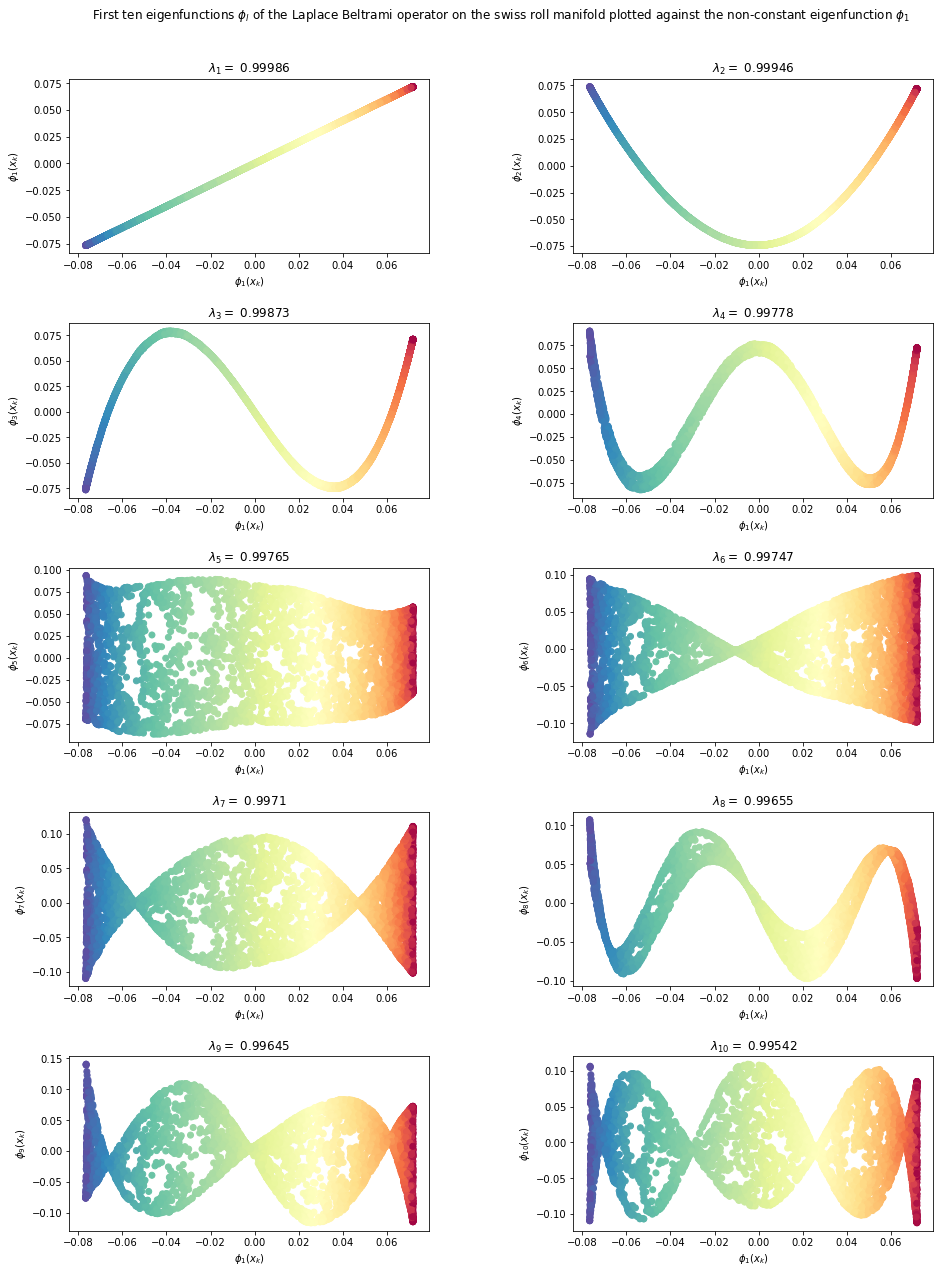

In [7]:
# plot first ten eigenfunctions of Laplace Betrami operator on swiss-roll dataset against the first non-constant eigenfunction, phi_1
fig = plt.figure(figsize=(15, 20))

for idx in range(1, phi_l_swiss.shape[1]):
    ax = fig.add_subplot(5, 2, idx)
    ax.scatter(phi_l_swiss[:, -2], phi_l_swiss[:, -1 - idx], c=time_swiss, cmap=plt.cm.Spectral)
    ax.set_title(r"$\lambda_{" + str(idx) + "} =$ " + str(round(lambda_l_swiss[-1 - idx], 5)))
    ax.set_xlabel(r"$\phi_1(x_k)$")
    ax.set_ylabel(r"$\phi_{" + str(idx) + "}(x_k)$")

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle(r"First ten eigenfunctions $\phi_l$ of the Laplace Beltrami operator on the swiss roll manifold plotted against the non-constant eigenfunction $\phi_1$", y=0.95)

# compute the three principal components of swiss-roll
X_swiss_centered = center_data(X_swiss)
_, _, v_t = np.linalg.svd(X_swiss_centered)
print("The 3 principal components of swiss-roll data sets are the columns of the following matrix:\n" + str(v_t.transpose()));

In [ ]:
# load the file that contains pedestrian information
data_ped = np.loadtxt("./data/data_DMAP_PCA_vadere.txt", delimiter=' ')
# apply diffusion map algorithm
lambda_ped, phi_ped = diffusion_map(data_ped, 2)
lambda_ped = np.diag(lambda_ped)
data_ped_truncated = phi_ped @ lambda_ped

# plot truncated data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r"$\lambda_0\phi_0$")
ax.set_ylabel(r"$\lambda_1\phi_1$")
ax.set_zlabel(r"$\lambda_2\phi_2$")
ax.set_title("Path of 15 pedestrians in 2D reduced to 3-dimensional space using Diffusion Map Algorithm", x=0.55)
ax.scatter(data_ped_truncated[:, -1], data_ped_truncated[:, -2], data_ped_truncated[:, -3], color='red')

fig.savefig("figures/ped-data.pdf")